<a href="https://colab.research.google.com/github/Elsatron/wotech_est/blob/main/Individual_task_learning_from_Titanic_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Data Analysis with Python Pandas

**Objective**: In this assignment, you will familiarize yourself with Python Pandas, a powerful library for data manipulation and analysis. You will use the Titanic dataset to perform exploratory data analysis (EDA) and create a visualization using Matplotlib pyplot.

**Dataset Acquisition**: Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
# Display the first few rows to get an overview of the data structure.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Check the dimensions of the dataset (number of rows and columns).
df.shape

(891, 12)

In [8]:
# Identify missing values and decide on strategies for handling them.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

# AGE
mean_age = df['Age'].mean().round(2)
median_age = df['Age'].median()
min_age = df['Age'].min()
max_age = df['Age'].max()

results = {
    'Mean Age': mean_age,
    'Median Age': median_age,
    'Minimum Age': min_age,
    'Maximum Age': max_age
}

results

{'Mean Age': 29.7,
 'Median Age': 28.0,
 'Minimum Age': 0.42,
 'Maximum Age': 80.0}

In [13]:
# SEX
sex_counts = df['Sex'].value_counts()
sex_counts

,count
Sex,
male,577
female,314


In [11]:
# Analyzing unique values and frequency distribution of categorical variables

categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin']

# Storing results in a dictionary
categorical_analysis = {}

for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    proportion = df[column].value_counts(normalize=True)

    categorical_analysis[column] = {
        'Unique Values': unique_values,
        'Value Counts': value_counts,
        'Proportion': proportion
    }

categorical_analysis


{'Survived': {'Unique Values': array([0, 1]),
  'Value Counts': Survived
  0    549
  1    342
  Name: count, dtype: int64,
  'Proportion': Survived
  0    0.616162
  1    0.383838
  Name: proportion, dtype: float64},
 'Pclass': {'Unique Values': array([3, 1, 2]),
  'Value Counts': Pclass
  3    491
  1    216
  2    184
  Name: count, dtype: int64,
  'Proportion': Pclass
  3    0.551066
  1    0.242424
  2    0.206510
  Name: proportion, dtype: float64},
 'Sex': {'Unique Values': array(['male', 'female'], dtype=object),
  'Value Counts': Sex
  male      577
  female    314
  Name: count, dtype: int64,
  'Proportion': Sex
  male      0.647587
  female    0.352413
  Name: proportion, dtype: float64},
 'Embarked': {'Unique Values': array(['S', 'C', 'Q', nan], dtype=object),
  'Value Counts': Embarked
  S    644
  C    168
  Q     77
  Name: count, dtype: int64,
  'Proportion': Embarked
  S    0.724409
  C    0.188976
  Q    0.086614
  Name: proportion, dtype: float64},
 'Cabin': {'Unique

In [14]:
# Replacing 0 with 'No' and 1 with 'Yes'
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})

# Performing the analysis again
df['Survived'].unique(), df['Survived'].value_counts(), df['Survived'].value_counts(normalize=True)

(array(['No', 'Yes'], dtype=object),
 Survived
 No     549
 Yes    342
 Name: count, dtype: int64,
 Survived
 No     0.616162
 Yes    0.383838
 Name: proportion, dtype: float64)

In [15]:
df['Pclass'] = df['Pclass'].replace({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})

df['Pclass'].unique(), df['Pclass'].value_counts(), df['Pclass'].value_counts(normalize=True)

(array(['3rd Class', '1st Class', '2nd Class'], dtype=object),
 Pclass
 3rd Class    491
 1st Class    216
 2nd Class    184
 Name: count, dtype: int64,
 Pclass
 3rd Class    0.551066
 1st Class    0.242424
 2nd Class    0.206510
 Name: proportion, dtype: float64)

In [16]:
df['Sex'] = df['Sex'].replace({'male': 'Male', 'female': 'Female'})

df['Sex'].unique(), df['Sex'].value_counts(), df['Sex'].value_counts(normalize=True)

(array(['Male', 'Female'], dtype=object),
 Sex
 Male      577
 Female    314
 Name: count, dtype: int64,
 Sex
 Male      0.647587
 Female    0.352413
 Name: proportion, dtype: float64)

In [17]:
df['Embarked'] = df['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

df['Embarked'].unique(), df['Embarked'].value_counts(), df['Embarked'].value_counts(normalize=True)

(array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object),
 Embarked
 Southampton    644
 Cherbourg      168
 Queenstown      77
 Name: count, dtype: int64,
 Embarked
 Southampton    0.724409
 Cherbourg      0.188976
 Queenstown     0.086614
 Name: proportion, dtype: float64)

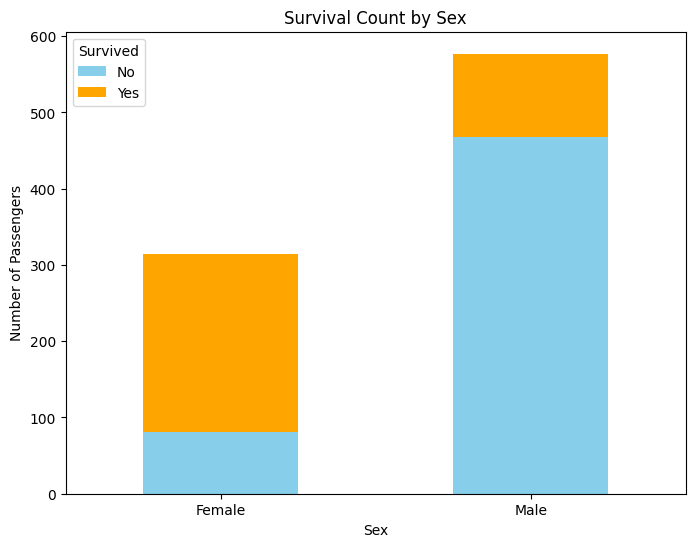

In [18]:
# Grouping the data by variables and counting the occurrences
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Creating a bar plot
survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])

# Customizing
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)

plt.show()

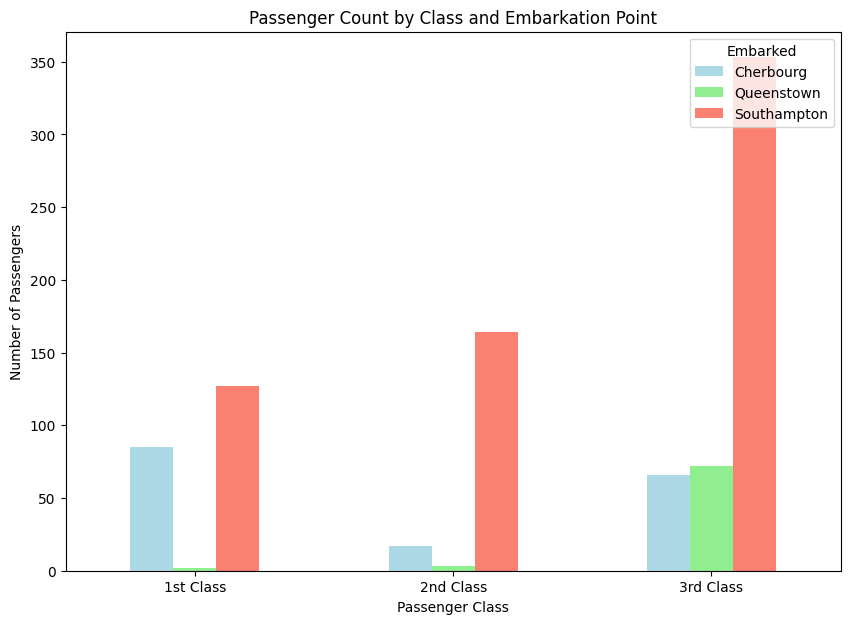

In [20]:
pclass_embarked_counts = df.groupby(['Pclass', 'Embarked']).size().unstack()

pclass_embarked_counts.plot(kind='bar', figsize=(10, 7), color=['lightblue', 'lightgreen', 'salmon'])

plt.title('Passenger Count by Class and Embarkation Point')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Embarked', loc='upper right')

plt.show()